In [47]:
import pandas as pd 
import helpers as h 
import constants as c
h.latex(True)

2025-02-08 13:55:44 - analysis-helpers - INFO - Enabling LaTeX for matplotlib.


In [48]:
nyc311_flooding_sep29 = pd.read_csv("../../aggregation/flooding/data/nyc311_flooding_sep29.csv")

In [49]:
nyc311_flooding_sep29

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,58965311,2023-09-29T23:53:00.000,2023-09-30T01:40:00.000,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11207.0,339 WYONA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670462,-73.892554,"\n, \n(40.670461855689496, -73.89255367003082)"
1,58957633,2023-09-29T23:47:00.000,2023-09-30T12:15:00.000,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11364.0,57-44 229 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.753306,-73.750132,"\n, \n(40.75330575318301, -73.7501324133223)"
2,58966873,2023-09-29T23:38:00.000,2023-09-30T04:40:00.000,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11694.0,109-34 ROCKAWAY BEACH BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.581468,-73.831265,"\n, \n(40.58146791395729, -73.83126548969187)"
3,58959205,2023-09-29T23:38:00.000,2023-09-30T00:59:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11218.0,11 EAST 10 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.648040,-73.970598,"\n, \n(40.648039502907295, -73.97059787328804)"
4,58963762,2023-09-29T23:38:00.000,2023-09-30T13:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,11420.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664919,-73.822631,"\n, \n(40.66491867378627, -73.82263052827594)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,58945925,2023-09-28T08:23:00.000,2023-09-29T06:40:00.000,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,11233.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683770,-73.926241,"\n, \n(40.683770352343984, -73.92624075847945)"
2189,58945926,2023-09-28T08:02:00.000,2023-09-29T22:55:00.000,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,11231.0,127 3 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678425,-73.996726,"\n, \n(40.67842516994581, -73.99672640096483)"
2190,58945920,2023-09-28T07:23:00.000,2023-09-28T09:54:00.000,DEP,Department of Environmental Protection,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),NaN,10467.0,2996 HOLLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.869553,-73.865259,"\n, \n(40.86955314385188, -73.86525922168619)"
2191,58947189,2023-09-28T06:47:00.000,2023-09-28T09:50:00.000,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11207.0,565 LIVONIA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664416,-73.896352,"\n, \n(40.664415846690396, -73.89635177073404)"


In [50]:
nyc311_flooding_sep29['descriptor'].value_counts()

descriptor
Sewer Backup (Use Comments) (SA)                    1080
Street Flooding (SJ)                                 632
Catch Basin Clogged/Flooding (Use Comments) (SC)     433
Manhole Overflow (Use Comments) (SA1)                 37
Highway Flooding (SH)                                 11
Name: count, dtype: int64

In [51]:
# earliest and latest time 
nyc311_flooding_sep29['created_date'] = pd.to_datetime(nyc311_flooding_sep29['created_date'])
nyc311_flooding_sep29['closed_date'] = pd.to_datetime(nyc311_flooding_sep29['closed_date'])
print(nyc311_flooding_sep29['created_date'].min(), nyc311_flooding_sep29['created_date'].max())

2023-09-28 05:44:00 2023-09-29 23:53:00


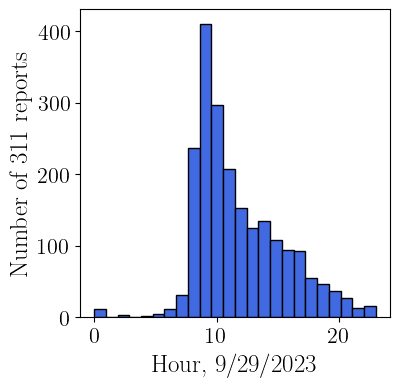

In [60]:
# histogram of 311 reports by time, but filter for ones on sep 29 
nyc311_flooding_sep29 = nyc311_flooding_sep29[nyc311_flooding_sep29['created_date'].dt.date == pd.to_datetime('2023-09-29').date()]

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(4,4))

nyc311_flooding_sep29['created_date'].dt.hour.hist(bins=24, ax=ax, edgecolor='black', color='royalblue')
plt.xlabel('Hour, 9/29/2023', fontsize=18)
plt.ylabel('Number of 311 reports', fontsize=18)

# set x and y ticks font size 
ax.tick_params(axis='both', which='major', labelsize=16)


# no grid 
ax.grid(False)

plt.savefig(f"{c.PAPER_PATH}/figures/nyc311_flooding_sep29_hourly_histogram.pdf", bbox_inches='tight', dpi=200)

